## ANN 실습하기

### ANN으로 회귀 분석하기

In [23]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

In [24]:
N = 1000
X = np.random.random((N,2)) * 6 - 3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

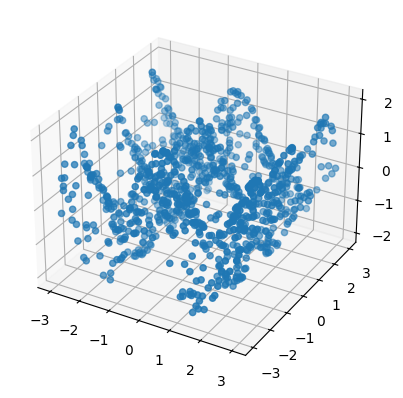

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

In [26]:
# model 설계
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)

])

C:\Users\its\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
opt = tf.keras.optimizers.Adam(0.01)

model.compile(optimizer=opt, loss='mse')

r = model.fit(X,Y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - loss: 0.9756 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 1.0017
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 0.8485
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.8945
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 0.9174
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 0.8391
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 0.7326
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 0.6590
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 0.6314
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 0.5639
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 0.5675
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 0.5071
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 0.5083
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.5125
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s

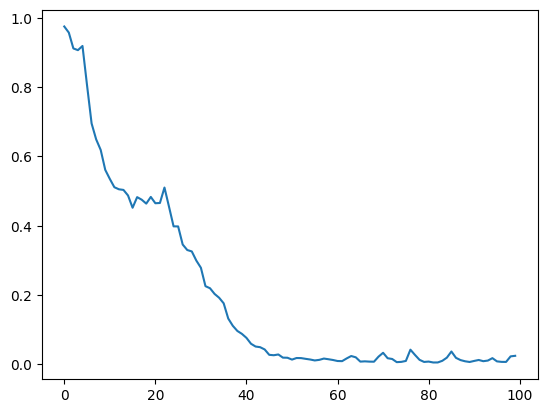

In [28]:
plt.plot(r.history['loss'], label = 'loss')

### 분류분석

In [29]:
#MNIST 데이터셋 (내장된 데이터셋)

mnist = tf.keras.datasets.mnist

In [30]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [31]:
# normalization 데이터 정규화 : 0~1 <- 이미지의 색상 0~255 사이값을 가진다.
x_train, x_test = x_train/255.0, x_test/255.0

In [32]:
x_train.shape

(60000, 28, 28)

In [33]:
# Step 3. 모델 설계

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)), # 이미지 데이터(array)를 ANN으로 처리하려면 Flatten 해야됨
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') # 원래는 노드 수가 몇개인지 확인하는 과정 필요

])

C:\Users\its\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

In [35]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8737 - loss: 0.4332 - val_accuracy: 0.9556 - val_loss: 0.1481
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9641 - loss: 0.1248 - val_accuracy: 0.9713 - val_loss: 0.0966
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9745 - loss: 0.0838 - val_accuracy: 0.9738 - val_loss: 0.0884
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9825 - loss: 0.0590 - val_accuracy: 0.9745 - val_loss: 0.0810
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9860 - loss: 0.0453 - val_accuracy: 0.9758 - val_loss: 0.0782


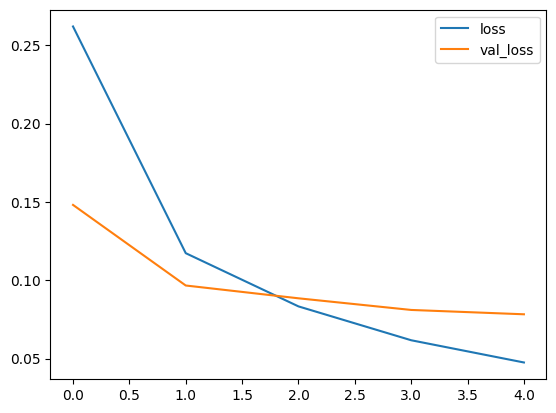

In [36]:
# step 4. 모델 평가

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

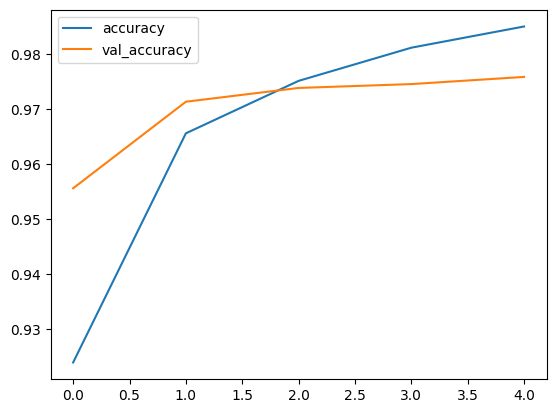

In [37]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [38]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.9717 - loss: 0.0947


[0.07824311405420303, 0.9757999777793884]

### 분류분석모형 평가
- 혼동행렬
- accuracy
- precision
- recall(sensitivity)
- f1 score

In [39]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

In [40]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
cm

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step


array([[ 972,    0,    1,    2,    0,    0,    1,    1,    3,    0],
       [   0, 1119,    4,    1,    0,    1,    1,    0,    8,    1],
       [   6,    0,  993,    4,    5,    0,    2,   13,    9,    0],
       [   0,    0,    0, 1000,    0,    3,    0,    5,    2,    0],
       [   1,    0,    1,    1,  961,    0,    3,    2,    2,   11],
       [   3,    0,    0,   16,    2,  862,    2,    2,    5,    0],
       [   8,    3,    1,    1,    7,    6,  927,    0,    4,    1],
       [   1,    3,    6,    4,    1,    0,    0, 1002,    3,    8],
       [   3,    0,    3,    8,    6,    2,    1,    6,  942,    3],
       [   1,    4,    0,    6,    6,    3,    0,    6,    3,  980]],
      dtype=int64)

Text(0.5, 1.0, 'True label : 0 Predicted 8')

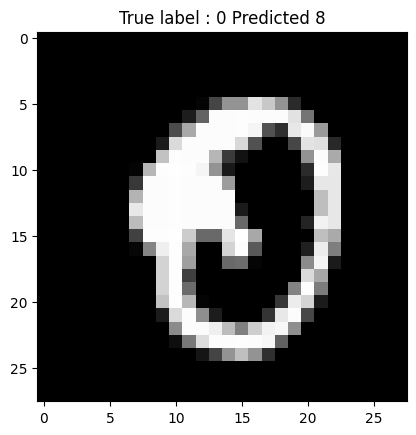

In [41]:
# 틀린 샘플 보기

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label : %s Predicted %s' %(y_test[i], p_test[i]))

In [42]:
print(x_test.shape)

(10000, 28, 28)


In [43]:
pred = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step


In [45]:
import cv2
import numpy as np

result = np.absolute(y_test - pred)
misclassified_indices = np.nonzero(result > 0)
print(f'틀린 데이터의 인덱스:{misclassified_indices}')
print(f'틀린 데이터 수:' , len(misclassified_indices[0]))

틀린 데이터의 인덱스:(array([  96,  115,  151,  217,  247,  321,  340,  381,  445,  449,  495,
        578,  582,  619,  645,  659,  684,  691,  707,  726,  740,  844,
        882,  947,  951,  956,  965, 1014, 1039, 1044, 1181, 1182, 1226,
       1242, 1247, 1299, 1319, 1328, 1364, 1393, 1494, 1500, 1522, 1530,
       1549, 1553, 1609, 1670, 1681, 1709, 1717, 1754, 1790, 1800, 1822,
       1850, 1878, 1880, 1901, 1941, 1952, 1981, 1984, 2004, 2016, 2044,
       2053, 2070, 2098, 2109, 2118, 2130, 2135, 2182, 2185, 2272, 2291,
       2293, 2329, 2387, 2406, 2414, 2422, 2454, 2488, 2526, 2597, 2618,
       2635, 2654, 2730, 2743, 2760, 2810, 2877, 2896, 2915, 2939, 2995,
       3005, 3060, 3073, 3117, 3132, 3289, 3405, 3422, 3503, 3520, 3558,
       3559, 3567, 3597, 3599, 3626, 3681, 3702, 3727, 3749, 3751, 3776,
       3780, 3796, 3808, 3811, 3838, 3853, 3876, 3902, 3906, 3926, 3939,
       3941, 3943, 3946, 4065, 4075, 4154, 4156, 4176, 4193, 4199, 4224,
       4248, 4289, 4294, 4356, 4360, 4

In [46]:
# 이미지 출력 함수

def imshow(title='', image=None, size=6):
    if image.any():
        w, h = image.shape[0], image.shape[1]
        aspect_ratio = w/h

        plt.figure(figsize = (size * aspect_ratio, size))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.show()
    
    else:
        print('Image not found')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


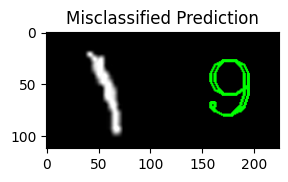

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


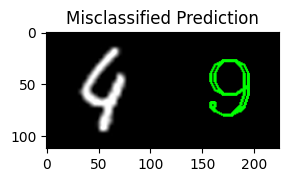

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


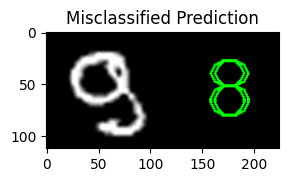

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


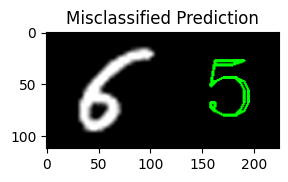

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


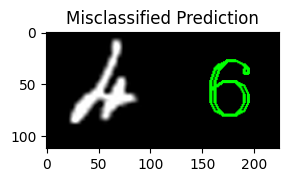

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


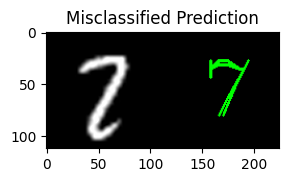

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


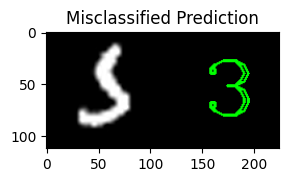

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


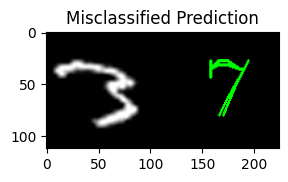

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


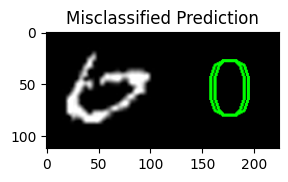

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


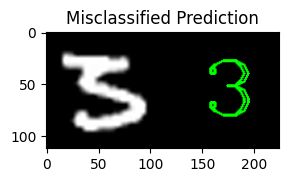

In [48]:
# 데이터 다시 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0], cv2.BORDER_CONSTANT, value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (150,80), cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0,255,0), 2)
    imshow(name, expanded_image)

for i in range(10):
    input_im = x_test[misclassified_indices[0][i]]

    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)

    input_im = input_im.reshape(1,28,28,1)

    res = str(np.argmax(model.predict(input_im), axis=-1)[0])
    draw_test("Misclassified Prediction", res, np.uint8(imageL))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


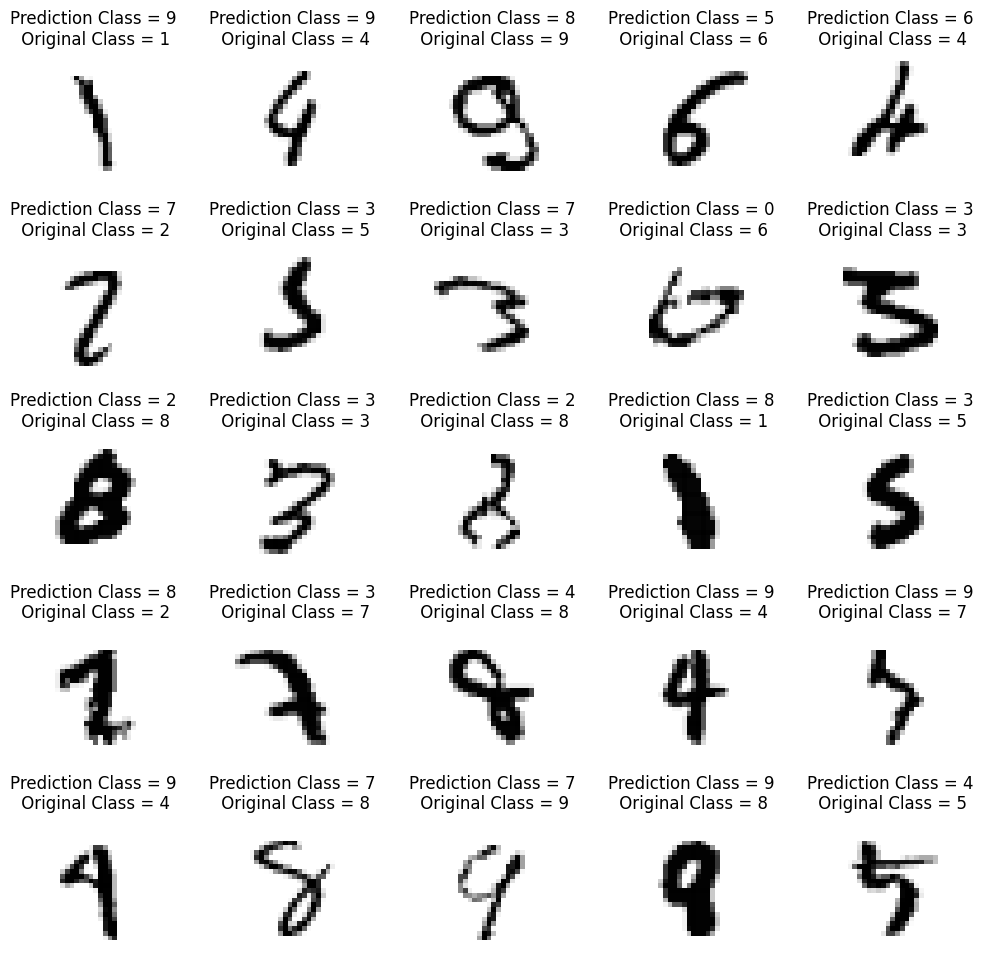

In [50]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    input_im = x_test[misclassified_indices[0][i]]
    ind = misclassified_indices[0][i]
    predicted_class = str(np.argmax(model.predict(input_im.reshape(1,28,28,1)), axis=-1)[0])
    axes[i].imshow(input_im.reshape(28,28), cmap='gray_r')
    axes[i].set_title(f"Prediction Class = {predicted_class}\n Original Class = {y_test[ind]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

### Class 별로 정확도 살펴보기

In [53]:
class_accuracy = 100 * cm.diagonal() / cm.sum(1)

class_accuracy

array([99.18367347, 98.59030837, 96.22093023, 99.00990099, 97.86150713,
       96.6367713 , 96.76409186, 97.47081712, 96.71457906, 97.1258672 ])

In [54]:
for (i,ca) in enumerate(class_accuracy):
    print(f'Accuracy for {i} : {ca:.3f}%')

Accuracy for 0 : 99.184%
Accuracy for 1 : 98.590%
Accuracy for 2 : 96.221%
Accuracy for 3 : 99.010%
Accuracy for 4 : 97.862%
Accuracy for 5 : 96.637%
Accuracy for 6 : 96.764%
Accuracy for 7 : 97.471%
Accuracy for 8 : 96.715%
Accuracy for 9 : 97.126%


In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.99      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

